<a href="https://colab.research.google.com/github/lellabhaskar/DataScience/blob/main/2p_BreastCancerAnalysis_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

data.csv  sample_data


In [2]:
#Upload BreastCancerAnalysis DataSet

import pandas as pd
data=pd.read_csv('data.csv',header=0)
data.head()
data.columns
#columns need to be display

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
inputs=data.loc[:,['id','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

inputs=inputs.set_index('id') #inplace =True
inputs.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [4]:
# Z-SCORE 
stats=inputs.describe().T
mu= stats['mean']
sigma=stats['std']
scaled_inputs =(inputs-mu)/sigma
scaled_inputs.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764
842517,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889
84300903,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658
84348301,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602
84358402,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956


In [5]:
scaled_inputs.to_csv('scaled_data.csv')

In [6]:
diagnosis =data.loc[:,'diagnosis']
diagnosis 

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:

# use logic to convert M and B to 1 and 0 using Labda

encoding_logic_number = lambda value: 1 if value=='M' else 0
y = diagnosis.map(encoding_logic_number)
print(y)
x=scaled_inputs
print(x)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
          radius_mean  texture_mean  ...  symmetry_mean  fractal_dimension_mean
id                                   ...                                       
842302       1.096100     -2.071512  ...       2.215566                2.253764
842517       1.828212     -0.353322  ...       0.001391               -0.867889
84300903     1.578499      0.455786  ...       0.938859               -0.397658
84348301    -0.768233      0.253509  ...       2.864862                4.906602
84358402     1.748758     -1.150804  ...      -0.009552               -0.561956
...               ...           ...  ...            ...                     ...
926424       2.109139      0.720838  ...      -0.312314               -0.930209
926682       1.703356      2.083301  ...      -0.217473               -1.057681
926954       0.701667      2.043775  ...      -0.808406   

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


print(len(xtrain))
print(len(xtest))   # This should be 20% of len(input)
print(len(ytrain))
print(len(ytest))

455
114
455
114


In [9]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
859471,-1.446714,-0.455622,-1.365450,-1.149113,0.728073,0.699812,2.812359,-0.133216,1.092064,2.501626
873593,1.975770,1.692697,2.087782,1.864406,1.261345,3.386663,2.005784,2.594677,2.128020,1.583827
859196,-1.405852,-1.262405,-1.348576,-1.119560,-1.361640,-0.318692,-0.362762,-0.698896,1.931042,0.967711
88466802,-0.986732,1.378819,-0.986010,-0.874898,0.014912,-0.605933,-0.815473,-0.844504,0.311449,0.069740
858970,-1.122939,-1.025253,-1.128403,-0.974639,1.211573,-0.449342,-0.977916,-0.928260,3.397431,0.963462


In [10]:
# Let's apply our first 1 algorithm for comparison-> Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
import time
from sklearn.metrics import accuracy_score

time_all = [] # we don't want a SLOW algorithms
acc_all = [] # we want correct number of guesses
time_error = 1.9788742065429688e-05

starttime = time.time()

model = SGDClassifier()
# First step is TRAINING-> Provide it all training input and output 
model.fit(xtrain, ytrain)
# Second is SCORING/TESTING -> Provide it all testing input but not output
# we are expecting the model to give us predictions for comparison
predictions = model.predict(xtest)

endtime = time.time()

# Third step is EVALUATE the model -> Compare the predictions to answer that you already know!
accr = accuracy_score(predictions, ytest)

timetaken  = endtime - starttime - time_error
print('Time taken by Stochastic Gradient Descent is: ' + str(timetaken))
print('Accuracy of Stochastic Gradient Descent is: ' + str(accr))



Time taken by Stochastic Gradient Descent is: 0.004947185516357422
Accuracy of Stochastic Gradient Descent is: 0.8771929824561403


In [ ]:
# Probabilistic algorithms -> works on probability and will give you a different output every time--> SGD, DT, RF
# Empirical algorithms -> will give you Same output everytime because they are dependent on Graphs-->Lin reg, SVMs
# Graph cannot be changed because same points will always lead to the same boundary

In [11]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1])

In [12]:
ytest.to_numpy()

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [13]:
# Training and Testing Data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# 3 algorithms for comparison-> SGD,SVC,LinearSVC
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph

import time 
from sklearn.metrics import accuracy_score

# all algos list for comparision 
algos = {'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC()}
time_all = [] 
acc_all = []

time_error = 1.9788742065429688e-05

for name,algo in algos.items():
  print('Starting algorithm is: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  time_all.append(timetaken)
  acc_all.append(accur)

Starting algorithm is: SGD
Time taken by SGD is: 0.004415035247802734
Accuracy of SGD is: 0.8771929824561403
Starting algorithm is: LinearSVC
Time taken by LinearSVC is: 0.008595943450927734
Accuracy of LinearSVC is: 0.9385964912280702
Starting algorithm is: SVC
Time taken by SVC is: 0.008201837539672852
Accuracy of SVC is: 0.9736842105263158


In [14]:

# added more algorithms for comparisons
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 

import time 
from sklearn.metrics import accuracy_score

# all algos list for comparision 
algos = {'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 
         'Sherlock':GaussianNB(), 'Dtree':DecisionTreeClassifier(),
         'RFPlain': RandomForestClassifier(),#Default value is 100 as per sklearn document
         'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200)}
time_all = [] 
acc_all = []

time_error = 1.9788742065429688e-05

for name,algo in algos.items():
  print('Starting algorithm is: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)
  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))
  time_all.append(timetaken)
  acc_all.append(accur)

Starting algorithm is: SGD
Time taken by SGD is: 0.00748443603515625
Accuracy of SGD is: 0.9473684210526315
Starting algorithm is: LinearSVC
Time taken by LinearSVC is: 0.011837482452392578
Accuracy of LinearSVC is: 0.9385964912280702
Starting algorithm is: SVC
Time taken by SVC is: 0.00797414779663086
Accuracy of SVC is: 0.9736842105263158
Starting algorithm is: Sherlock
Time taken by Sherlock is: 0.003668546676635742
Accuracy of Sherlock is: 0.9385964912280702
Starting algorithm is: Dtree
Time taken by Dtree is: 0.005694150924682617
Accuracy of Dtree is: 0.9473684210526315
Starting algorithm is: RFPlain


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Time taken by RFPlain is: 0.20276713371276855
Accuracy of RFPlain is: 0.9473684210526315
Starting algorithm is: RF5
Time taken by RF5 is: 0.015176534652709961
Accuracy of RF5 is: 0.9473684210526315
Starting algorithm is: RF200
Time taken by RF200 is: 0.39804530143737793
Accuracy of RF200 is: 0.956140350877193


In [ ]:
# Cross Validation Score 
# CROSS Val Score is accuracy on SUB-SET(s) of dataset

In [15]:
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 

import time 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
import numpy as np

# all algos list for comparision 
algos = {'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 
         'Sherlock':GaussianNB(), 'Dtree':DecisionTreeClassifier(),
         'RFPlain': RandomForestClassifier(),#Default value is 100 as per sklearn document
         'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200)}
time_all = [] 
acc_all = []

cvs_all = []

time_error = 1.9788742065429688e-05

for name,algo in algos.items():
  print('Starting algorithm is: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)

  cv_score = cross_val_score(model,x, y, cv=5 ) # no. of cross validations

  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))

  print('CVS of '+ name +' is: ' + str(cv_score)) # 5 experiements 

  time_all.append(timetaken)
  acc_all.append(accur)

  cvs_all.append(np.mean(cv_score))   # AVERAGE of experiements of 5 

Starting algorithm is: SGD
Time taken by SGD is: 0.0047190189361572266
Accuracy of SGD is: 0.956140350877193
CVS of SGD is: [0.88596491 0.88596491 0.93859649 0.92105263 0.90265487]
Starting algorithm is: LinearSVC
Time taken by LinearSVC is: 0.011121749877929688
Accuracy of LinearSVC is: 0.9385964912280702
CVS of LinearSVC is: [0.88596491 0.93859649 0.95614035 0.95614035 0.92920354]
Starting algorithm is: SVC
Time taken by SVC is: 0.007985591888427734
Accuracy of SVC is: 0.9736842105263158
CVS of SVC is: [0.90350877 0.93859649 0.94736842 0.96491228 0.92920354]
Starting algorithm is: Sherlock
Time taken by Sherlock is: 0.0035026073455810547
Accuracy of Sherlock is: 0.9385964912280702
CVS of Sherlock is: [0.85964912 0.92105263 0.9122807  0.95614035 0.92035398]
Starting algorithm is: Dtree


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Time taken by Dtree is: 0.0061571598052978516
Accuracy of Dtree is: 0.9035087719298246
CVS of Dtree is: [0.92105263 0.90350877 0.90350877 0.92982456 0.92920354]
Starting algorithm is: RFPlain
Time taken by RFPlain is: 0.19330644607543945
Accuracy of RFPlain is: 0.956140350877193
CVS of RFPlain is: [0.89473684 0.93859649 0.94736842 0.98245614 0.95575221]
Starting algorithm is: RF5
Time taken by RF5 is: 0.013570547103881836
Accuracy of RF5 is: 0.9210526315789473
CVS of RF5 is: [0.87719298 0.93859649 0.92105263 0.96491228 0.92035398]
Starting algorithm is: RF200
Time taken by RF200 is: 0.3821094036102295
Accuracy of RF200 is: 0.9473684210526315
CVS of RF200 is: [0.90350877 0.94736842 0.94736842 0.98245614 0.95575221]


In [ ]:
print(cvs_all)
print(acc_all)

[0.9226828132277596, 0.9332091290172334, 0.9367179009470579, 0.9138953578636858, 0.9086632510479739, 0.9402577239559076, 0.924406148113647, 0.9437820214252446]
[0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9385964912280702, 0.9298245614035088, 0.9473684210526315, 0.9385964912280702, 0.9473684210526315]


In [ ]:
# As per overfitting, LinearSVC seems best
# but as per accuracy, SVC sounds best

# Typically try 10-20 algos, pick top 3-5 best algos based on various metrics 
# use them for few months! -> only then you will come to know in reality which algos were better 

In [ ]:
# https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce

# Subjects:

# Signal and Systems,  Linear Transformation, Linear Algebra
# Electrical Engineering ,Probability, Data Structures (Trees and Forests)


In [ ]:
#  K-Nearest Neighbors Algo

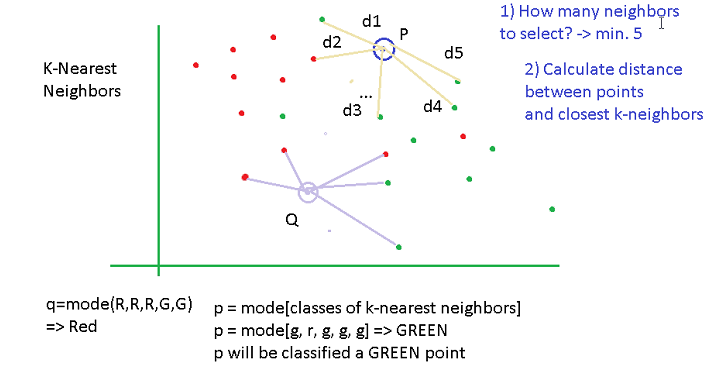

In [ ]:
# Distance formulae  Calucation

1. Eucledian  --Most used
2. Minkowski
3. Manhattan

These are integration formulas

# Calucation of Eucledian  Distance

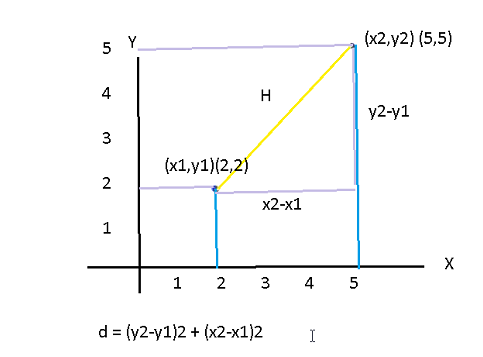

In [ ]:
# d is the distance between two points

In [ ]:
# Integration  -> Combine very very tiny (Infinitely Small) particles into one large object
# Differentiation  -> Break down a large object into INFINITELY small objects

# https://www.mathsisfun.com/calculus/
# https://www.mathsisfun.com/calculus/integration-rules.html

In [ ]:
#  K-Nearest Neighbors Algo -Example
# KNN (classification-Breast Cancer Analysis -- dataset)

In [16]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

import time 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.neighbors import KNeighborsClassifier

# all algos list for comparision 
algos = {'SGD':SGDClassifier(), 'LinearSVC':LinearSVC(), 'SVC':SVC(), 
         'Sherlock':GaussianNB(), 'Dtree':DecisionTreeClassifier(),
         'RFPlain': RandomForestClassifier(),#Default value is 100 as per sklearn document
         'RF5':RandomForestClassifier(n_estimators=5),'RF200':RandomForestClassifier(n_estimators=200),
         'KNN':KNeighborsClassifier()}
         
time_all = [] 
acc_all = []

cvs_all = []

time_error = 1.9788742065429688e-05

for name,algo in algos.items():
  print('Starting algorithm is: ' + name)
  starttime = time.time()
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  endtime = time.time()
  accur = accuracy_score(predictions, ytest)

  cv_score = cross_val_score(model,x, y, cv=5 )

  timetaken = endtime- starttime - time_error
  print('Time taken by '+ name +' is: ' + str(timetaken))
  print('Accuracy of '+ name +' is: ' + str(accur))

  print('CVS of '+ name +' is: ' + str(cv_score))

  time_all.append(timetaken)
  acc_all.append(accur)

  cvs_all.append(np.mean(cv_score))

Starting algorithm is: SGD
Time taken by SGD is: 0.00541377067565918
Accuracy of SGD is: 0.9385964912280702
CVS of SGD is: [0.85964912 0.93859649 0.9122807  0.95614035 0.90265487]
Starting algorithm is: LinearSVC
Time taken by LinearSVC is: 0.012260675430297852
Accuracy of LinearSVC is: 0.9385964912280702
CVS of LinearSVC is: [0.88596491 0.93859649 0.95614035 0.95614035 0.92920354]
Starting algorithm is: SVC
Time taken by SVC is: 0.010057210922241211
Accuracy of SVC is: 0.9736842105263158
CVS of SVC is: [0.90350877 0.93859649 0.94736842 0.96491228 0.92920354]
Starting algorithm is: Sherlock
Time taken by Sherlock is: 0.00603032112121582
Accuracy of Sherlock is: 0.9385964912280702
CVS of Sherlock is: [0.85964912 0.92105263 0.9122807  0.95614035 0.92035398]
Starting algorithm is: Dtree


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Time taken by Dtree is: 0.006340742111206055
Accuracy of Dtree is: 0.9385964912280702
CVS of Dtree is: [0.90350877 0.88596491 0.90350877 0.93859649 0.9380531 ]
Starting algorithm is: RFPlain
Time taken by RFPlain is: 0.2081289291381836
Accuracy of RFPlain is: 0.9473684210526315
CVS of RFPlain is: [0.88596491 0.94736842 0.92982456 0.98245614 0.94690265]
Starting algorithm is: RF5
Time taken by RF5 is: 0.015197992324829102
Accuracy of RF5 is: 0.9473684210526315
CVS of RF5 is: [0.87719298 0.92982456 0.92982456 0.96491228 0.94690265]
Starting algorithm is: RF200
Time taken by RF200 is: 0.38318371772766113
Accuracy of RF200 is: 0.9473684210526315
CVS of RF200 is: [0.90350877 0.93859649 0.94736842 0.98245614 0.94690265]
Starting algorithm is: KNN
Time taken by KNN is: 0.01041722297668457
Accuracy of KNN is: 0.9473684210526315
CVS of KNN is: [0.92982456 0.93859649 0.93859649 0.95614035 0.92920354]


In [17]:
print(cvs_all)
print(acc_all)

[0.9138643067846607, 0.9332091290172334, 0.9367179009470579, 0.9138953578636858, 0.9139264089427108, 0.9385033379909953, 0.9297314081664337, 0.943766495885732, 0.9384722869119703]
[0.9385964912280702, 0.9385964912280702, 0.9736842105263158, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315]


In [ ]:
# Tree POV:

# https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/

In [ ]:
Above all are Supervised algos.Supervised algo means that you know what the label is,
# Example LABEL was Diagnosis!"

In [ ]:
Unsupervised algos-> no idea what the label is, just figure out if things could be kept together 

Example: K-MEANS (clustering- dummy data)